In [1]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 15.6 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


In [2]:
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2024-12-31'

data = yf.download(ticker, start = start_date, end = end_date)

data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace = True)

data.reset_index(inplace = True)

data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.746224,24.757332,23.848704,24.288578,212818400
1,2015-01-05,24.057535,24.137513,23.417720,23.604332,257142000
2,2015-01-06,23.668762,23.866483,23.244438,23.606558,263188400
3,2015-01-07,23.815388,24.037547,23.704309,23.937576,160423600
4,2015-01-08,24.266371,24.915073,24.148625,24.857311,237458000


In [12]:
mean_volume = data['Volume'].mean()
std_volume = data['Volume'].std()

data['Volume_Z'] = (data['Volume'] - mean_volume)/std_volume

data['Anomaly_Z'] = (data['Volume_Z'].apply(lambda x: 1 if abs(x) > 3 else 0))

print("Number of anomalies detected (z_score method):", data['Anomaly_z'].sum())

Number of anomalies detected (z_score method): 47


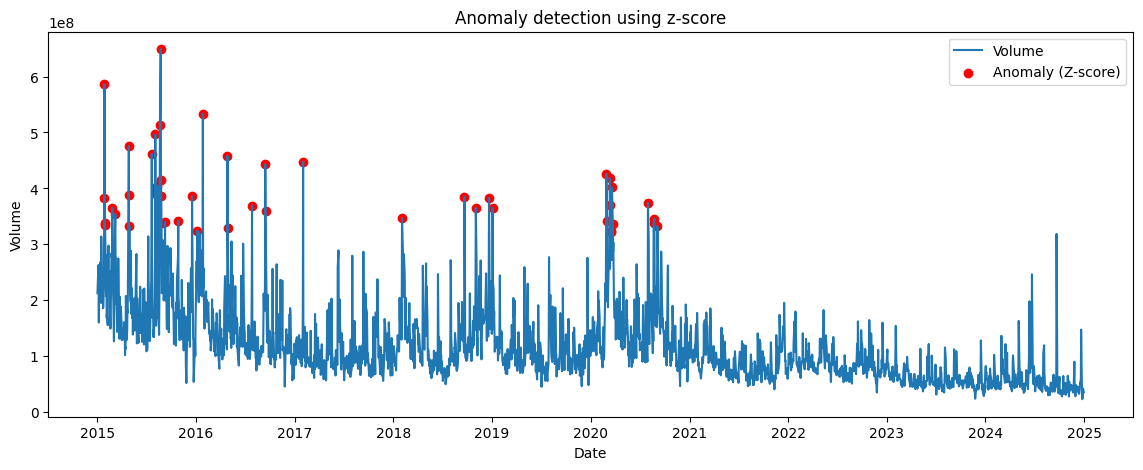

In [13]:
plt.figure(figsize=(14,5))
plt.plot(data['Date'], data['Volume'], label = 'Volume')
plt.scatter(data[data['Anomaly_z'] == 1]['Date'], data[data['Anomaly_z'] == 1]['Volume'], color = 'red', label = 'Anomaly (Z-score)')
plt.title('Anomaly detection using z-score')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()